Baseline-NN Model
-----------------------------

In [1]:
# Getting the dataset from the .npz file
import numpy as np

np.random.seed(42)

# Loading the date
data = np.load("preprocessed_data.npz")
x_train_flat, y_train = data["x_train_flat"], data["y_train"]
x_val_flat, y_val = data["x_val_flat"], data["y_val"]
x_test_flat, y_test = data["x_test_flat"], data["y_test"]

Dropout is a regularization technique, in which Dropout randomly set a fraction of the neuron's output to 0 in a layer in each forward pass.

In [11]:
# Training NN model with compared dropout
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import time

def build_model_with_dropout():
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


L2 Regularization is Ridge Regression, and it scales the weights towards 0

In [4]:
# With L2 Regularization

def build_model_with_l2():
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [14]:
# Training the models and comparing them
dropout_model = build_model_with_dropout()
l2_model = build_model_with_l2()

# Train both models
start_time = time.time()
dropout_history = dropout_model.fit(x_train_flat, y_train, validation_data=(x_val_flat, y_val), epochs=10, batch_size=64, verbose=2)
end_time = time.time()

train_time = end_time - start_time
print(f"Dropout NN-Model Train Time: {train_time}")

start_time = time.time()
l2_history = l2_model.fit(x_train_flat, y_train, validation_data=(x_val_flat, y_val), epochs=10, batch_size=64, verbose=2)
end_time = time.time()

train_time = end_time - start_time
print(f"L2 NN-Model Train Time: {train_time}")

Epoch 1/10
766/766 - 6s - 8ms/step - accuracy: 0.7150 - loss: 0.7908 - val_accuracy: 0.8272 - val_loss: 0.4752
Epoch 2/10
766/766 - 2s - 3ms/step - accuracy: 0.8049 - loss: 0.5477 - val_accuracy: 0.8500 - val_loss: 0.4303
Epoch 3/10
766/766 - 2s - 3ms/step - accuracy: 0.8216 - loss: 0.4975 - val_accuracy: 0.8536 - val_loss: 0.4103
Epoch 4/10
766/766 - 2s - 3ms/step - accuracy: 0.8320 - loss: 0.4740 - val_accuracy: 0.8604 - val_loss: 0.3928
Epoch 5/10
766/766 - 2s - 3ms/step - accuracy: 0.8365 - loss: 0.4552 - val_accuracy: 0.8609 - val_loss: 0.3878
Epoch 6/10
766/766 - 2s - 3ms/step - accuracy: 0.8400 - loss: 0.4443 - val_accuracy: 0.8592 - val_loss: 0.3929
Epoch 7/10
766/766 - 2s - 3ms/step - accuracy: 0.8437 - loss: 0.4325 - val_accuracy: 0.8693 - val_loss: 0.3667
Epoch 8/10
766/766 - 2s - 3ms/step - accuracy: 0.8460 - loss: 0.4244 - val_accuracy: 0.8656 - val_loss: 0.3743
Epoch 9/10
766/766 - 3s - 3ms/step - accuracy: 0.8516 - loss: 0.4130 - val_accuracy: 0.8718 - val_loss: 0.3645
E


Dropout Model:
Train Accuracy: 0.8491
Val Accuracy:   0.8691
Test Accuracy:  0.8710
Overfitting Gap: -0.0200

L2 Regularized Model:
Train Accuracy: 0.8756
Val Accuracy:   0.8543
Test Accuracy:  0.8590
Overfitting Gap: 0.0213


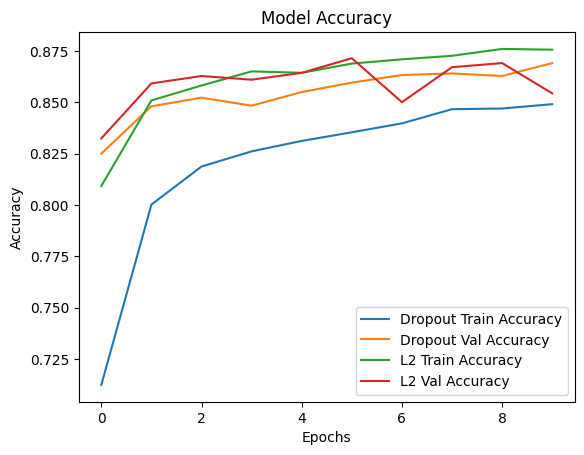

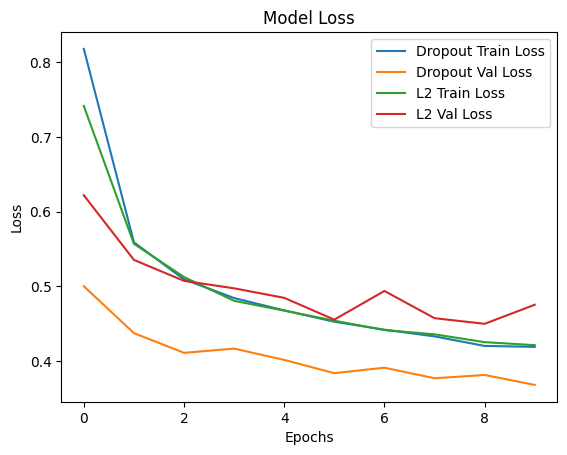

In [10]:
# Evaluate both models
dropout_train_acc = dropout_history.history['accuracy'][-1]
dropout_val_acc = dropout_history.history['val_accuracy'][-1]
dropout_test_acc = dropout_model.evaluate(x_test_flat, y_test, verbose=0)[1]  # test accuracy
dropout_gap = dropout_train_acc - dropout_val_acc

l2_train_acc = l2_history.history['accuracy'][-1]
l2_val_acc = l2_history.history['val_accuracy'][-1]
l2_test_acc = l2_model.evaluate(x_test_flat, y_test, verbose=0)[1]  # test accuracy
l2_gap = l2_train_acc - l2_val_acc

print("\nDropout Model:")
print(f"Train Accuracy: {dropout_train_acc:.4f}")
print(f"Val Accuracy:   {dropout_val_acc:.4f}")
print(f"Test Accuracy:  {dropout_test_acc:.4f}")
print(f"Overfitting Gap: {dropout_gap:.4f}")

print("\nL2 Regularized Model:")
print(f"Train Accuracy: {l2_train_acc:.4f}")
print(f"Val Accuracy:   {l2_val_acc:.4f}")
print(f"Test Accuracy:  {l2_test_acc:.4f}")
print(f"Overfitting Gap: {l2_gap:.4f}")

# Plotting training and validation accuracy vs epochs for both models
plt.plot(dropout_history.history['accuracy'], label='Dropout Train Accuracy')
plt.plot(dropout_history.history['val_accuracy'], label='Dropout Val Accuracy')
plt.plot(l2_history.history['accuracy'], label='L2 Train Accuracy')
plt.plot(l2_history.history['val_accuracy'], label='L2 Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plotting training and validation loss vs epochs for both models
plt.plot(dropout_history.history['loss'], label='Dropout Train Loss')
plt.plot(dropout_history.history['val_loss'], label='Dropout Val Loss')
plt.plot(l2_history.history['loss'], label='L2 Train Loss')
plt.plot(l2_history.history['val_loss'], label='L2 Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


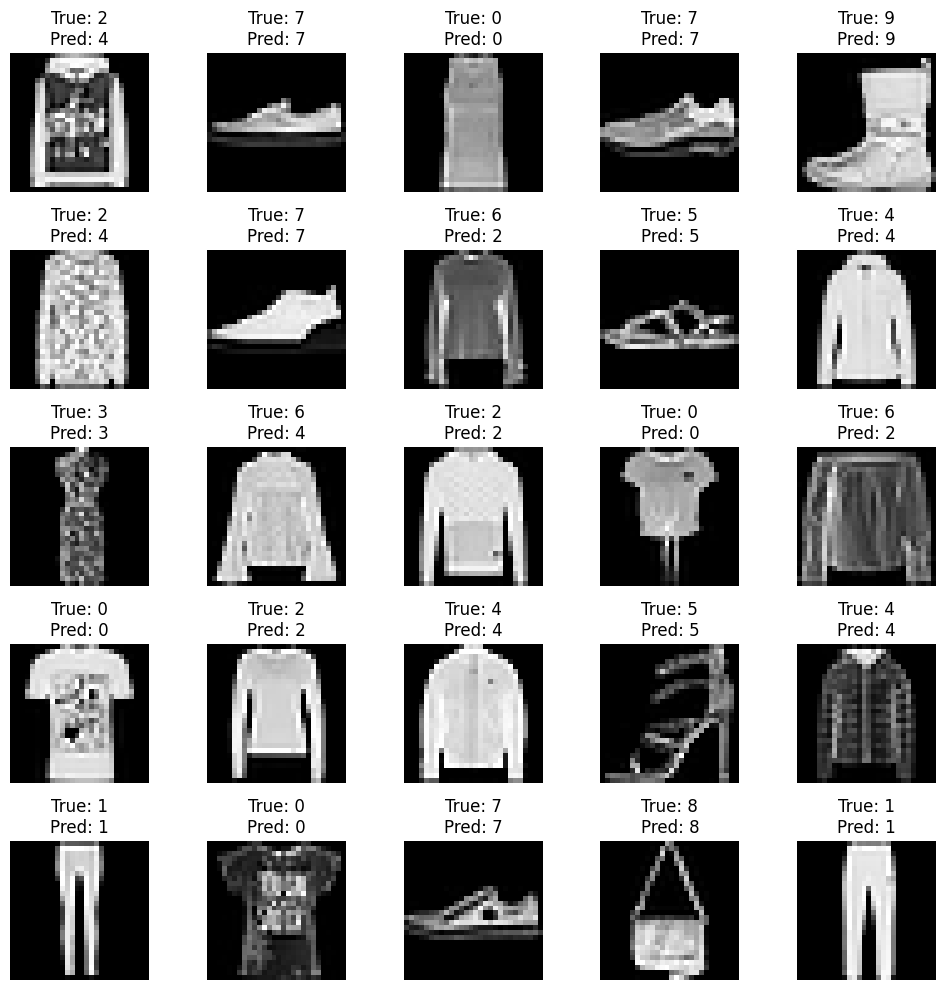

In [7]:
# Use L2 model for testing
predictions = l2_model.predict(x_test_flat[:25])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_test[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
